<h1 align=center>Trabalhando com dados não rotulados – Análise de cluster</h1>
<p align=center><img src=https://miro.medium.com/max/845/1*rFATWK6tWBrDJ1o1rzEZ8w.png></p>

Conhecemos algumas técnicas de aprendizado supervisionado para construir modelos de aprendizado de máquina, usando dados onde a resposta já era conhecida – os rótulos de classe já estavam disponíveis em nossos dados de treinamento. Agora, vamos mudar de marcha e explorar a **análise de cluster**, uma categoria de técnicas de *aprendizado não supervisionado* que nos permite descobrir estruturas ocultas em dados onde não sabemos a resposta certa antecipadamente. O objetivo do agrupamento é encontrar um agrupamento natural nos dados, de modo que os itens do mesmo agrupamento sejam mais semelhantes entre si do que os de agrupamentos diferentes.

### Agrupando objetos por similaridade usando *k-means*
Aprenderemos sobre um dos algoritmos de agrupamento mais populares, o *k-means*, que é amplamente utilizado na academia e na indústria. *Clustering* (ou análise de cluster) é uma técnica que nos permite encontrar grupos de objetos semelhantes que estão mais relacionados entre si do que com objetos de outros grupos. Exemplos de aplicativos de *clustering* orientados a negócios incluem o agrupamento de documentos, músicas e filmes por tópicos diferentes ou encontrar clientes que compartilhem interesses semelhantes com base em comportamentos de compra comuns como base para mecanismos de recomendação.

### Agrupamento *K-means* usando *scikit-learn*

Como você verá em um momento, o algoritmo *k-means* é extremamente fácil de implementar, mas também é **computacionalmente muito eficiente** em comparação com outros algoritmos de agrupamento, o que pode explicar sua popularidade. O algoritmo *k-means* pertence à categoria de agrupamento baseado em protótipo. Discutiremos duas outras categorias de agrupamento, **agrupamento hierárquico** e o **agrupamento baseado em densidade**.

Agrupamento baseado em protótipo significa que cada cluster é representado por um protótipo, que geralmente é o **centroide** (*média*) de pontos semelhantes com características contínuas, ou o **medoide** (o mais representativo ou o ponto que minimiza a distância a todos os outros pontos que pertencem para um determinado cluster) no caso de características categóricas. Embora o *k-means* seja muito bom para identificar *clusters* com formato esférico, uma das desvantagens desse algoritmo de agrupamento é que temos que especificar o número de *clusters*, $\small k$, a priori. Uma escolha inadequada para $\small k$ pode resultar em baixo desempenho de agrupamento. Mais adiante, discutiremos o **método do cotovelo** e os **gráficos de silhueta**, que são técnicas úteis para avaliar a qualidade de um agrupamento para nos ajudar a determinar o número ideal de agrupamentos, $\small k$.

Embora o clustering *k-means* possa ser aplicado a dados em dimensões mais altas, veremos os exemplos a seguir usando um conjunto de dados bidimensional simples para fins de visualização:

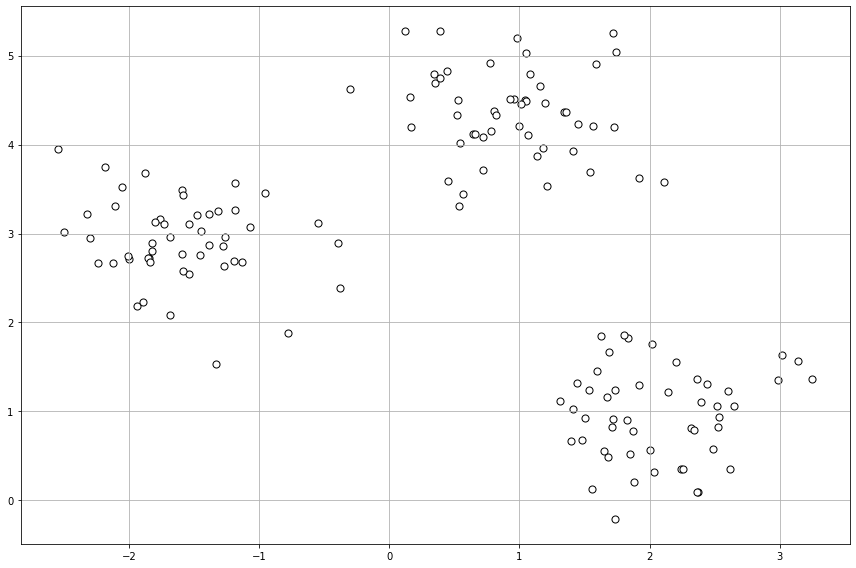

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

plt.show()

O conjunto de dados que acabamos de criar consiste em 150 pontos gerados aleatoriamente que são agrupados aproximadamente em três regiões com maior densidade, que são visualizadas por meio de um gráfico de dispersão bidimensional.

Em aplicações de agrupamento do mundo real, não temos nenhuma informação de categoria de verdade básica (informações fornecidas como evidência empírica em oposição a inferência) sobre esses exemplos; se nos dessem rótulos de classe, essa tarefa se enquadraria na categoria de aprendizado supervisionado. Assim, nosso objetivo é agrupar os exemplos com base em suas semelhanças de recursos, o que pode ser alcançado usando o algoritmo *k-means*, resumido pelas quatro etapas a seguir:
1. Escolha aleatoriamente $\small k$ centroides dos exemplos como centros iniciais do *cluster*.
2. Atribua cada exemplo ao centróide mais próximo, $\small \mu^{j},j \in \{1,\cdots, k\}$.
3. Mova os centroides para o centro dos exemplos que lhe foram atribuídos.
4. Repita as etapas 2 e 3 até que as atribuições de *cluster* não sejam alteradas ou uma tolerância definida pelo usuário ou número máximo de iterações seja atingido.

Agora, a próxima pergunta é: como medimos a similaridade entre objetos? Podemos definir similaridade como o oposto de distância, e uma distância comumente usada para agrupar exemplos com feições contínuas é a distância euclidiana quadrada entre dois pontos, $\small x$ e $\small y$, no espaço m-dimensional: